In [71]:
import pandas as pd
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

tableau10 = [(78, 121, 167), (242, 142, 43), (225, 87, 89), 
             (118, 183, 178), (89, 161, 79), (237, 201, 72), 
             (176, 122, 161), (225, 157, 167), (156, 117, 95), 
             (186, 176, 172)]

for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = (r / 255., g / 255., b / 255.)
    
from pylab import rcParams
rcParams['font.family'] = 'Roboto'
font0 = FontProperties()
font0.set_weight('light')
#font0.set_weight(1000)


In this IPython notebook, we will explore the top target-related genes in each cohort. Further, we will break each gene down by whether we had sensitivity value, resistance value, or prognostic value.

## VanAllen, Miao metastatic melanoma cohort (n = 110)

In [72]:
allFiles = glob.glob('mel-ipi/output/phial2-target2/*/*detailed.txt')
df = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, index_col = None, sep = '\t', comment = '#', low_memory = False)
    
    # Quick fix for fusions
    sample_ = df_[df_['Variant_Classification'] == 'Missense_Mutation'].ix[:,'Tumor_Sample_Barcode'].unique().tolist()[0]
    df_['Tumor_Sample_Barcode'] = sample_
    df_ = df_.drop_duplicates(subset = ['Gene', 'Variant_Classification', 'Alteration'])
    list_.append(df_)

df = pd.concat(list_, ignore_index = True)

# Quick fix for CNA....
index_ = df[df['bin'] == 'Investigate TARGET Actionability'].index.get_values()
df.ix[index_, 'Score_bin'] = 'Investigate TARGET Actionability'

for _index_ in index_:
    if abs(df.ix[_index_,'Segment_Mean']) > 1:
        df.ix[_index_,'bin'] = 1
    else:
        df.ix[_index_,'bin'] = 1.25
        
# Quick fix for mutational burden...
#index_ = df[df['Variant_Classification'] == "Coding Mutational Burden TCGA percentile"].index.get_values()
#_index_ = df.ix[index_,:][(df.ix[index_, 'bin'].astype(float) <= float(1))].index.get_values()
#df.ix[_index_, 'Score_bin'] = "High Priority"
#df.ix[_index_, 'Gene'] = "Mut Burden"
#df.ix[_index_, 'Variant_Classification'] = "Coding Mutational Burden TCGA Tissue Specific percentile"

df_clin = df[df['bin'].astype(float) <= float(2)]

genes = df_clin['Gene'].value_counts().head(15).index.get_values().tolist()
values = df_clin['Gene'].value_counts().head(15).tolist()

df_2 = df_clin
genes_2 = genes
values_2 = values

In [73]:
allFiles = glob.glob('mel-ipi/output/phial1-target1/*/*detailed.txt')
df = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, index_col = None, sep = '\t', comment = '#', low_memory = False)
    list_.append(df_)

df = pd.concat(list_, ignore_index = True)

df_clin = df[df['bin'].astype(float) <= float(2)]

values_1_2 = df_clin['Gene'].value_counts()[genes_2].fillna(0)

genes = df_clin['Gene'].value_counts().head(15).index.get_values().tolist()
values = df_clin['Gene'].value_counts().head(15).tolist()

df_1 = df_clin
genes_1 = genes
values_1 = values

In [74]:
delta_value = [i - j for i, j in zip(values_2, values_1_2)]

### Popular Genes

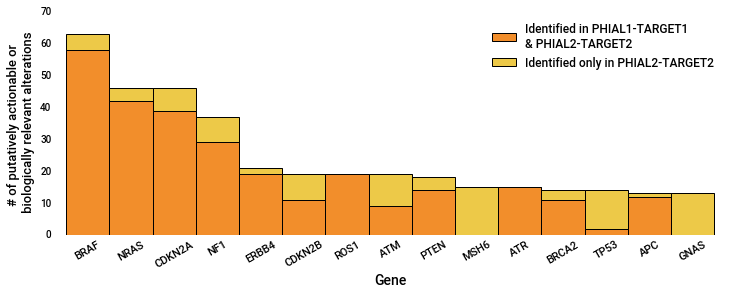

In [75]:
fig = plt.figure(figsize = (12,4))

ax = plt.subplot()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")  

plt.bar(range(0, len(genes)), values_1_2, 
        width = 1.0, color = tableau10[1], align="center",
        label= 'Identified in PHIAL1-TARGET1 \n& PHIAL2-TARGET2')
plt.bar(range(0, len(genes)), delta_value, 
        width = 1.0, color = tableau10[5], align="center", 
        label= 'Identified only in PHIAL2-TARGET2', bottom = values_1_2)

#plt.title('Top 15 mutated genes in Melanoma cohort', fontsize = 16)
plt.ylabel('# of putatively actionable or \n biologically relevant alterations', fontsize = 13)
plt.xlabel('Gene', fontsize = 14)

plt.xlim(-0.75,14.75)
ax.set_xticks(range(0, len(genes)))
ax.set_xticklabels(genes)
plt.xticks(rotation=30)
ax.xaxis.set_tick_params(labelsize=11)

plt.legend(frameon=False)
#plt.show()
plt.savefig('melanoma_genes.pdf', bbox_inches='tight')

### Actionable Patients

In [76]:
patients_actionable_1 = len(df_1['Tumor_Sample_Barcode'].unique())
frac_actionable_1 = float(patients_actionable_1) / float(110)

patients_actionable_2 = len(df_2['Tumor_Sample_Barcode'].unique())
frac_actionable_2 = float(patients_actionable_2) / float(110)
frac_notactionable = float(1) - frac_actionable_2

delta_actionable = frac_actionable_2 - frac_actionable_1

print 'Number of actionable patients in phial1:', str(patients_actionable_1)
print 'Number of actionable patients in phial2:', str(patients_actionable_2)
#print 'Not Actionable', str(not_actionable)

Number of actionable patients in phial1: 102
Number of actionable patients in phial2: 107


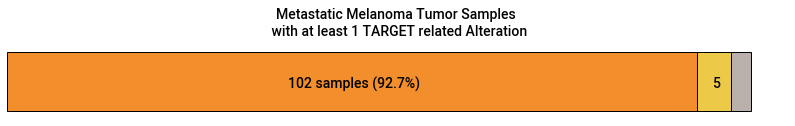

In [77]:
fig = plt.figure(figsize = (14,2))

ax = plt.subplot()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="off", left="off", right="off", labelleft="off") 

plt.barh(0.5, frac_actionable_1, color = tableau10[1], align = 'center')
plt.barh(0.5, delta_actionable, color = tableau10[5], left = frac_actionable_1, align = 'center')
plt.barh(0.5, frac_notactionable, color = tableau10[9], left = frac_actionable_2, align = 'center')

text1 = str(patients_actionable_1) + ' samples (' + str(round(frac_actionable_1*100,1)) + '%)'
plt.text(frac_actionable_1 - 0.55, 0.40, text1,
        fontsize = 14)
plt.text(frac_actionable_2 - 0.025, 0.40, '5', fontsize = 14)

plt.xlim(0,1.05)
plt.ylim(-.01,1.5)

plt.title('Metastatic Melanoma Tumor Samples \n with at least 1 TARGET related Alteration', 
          fontsize = 14, y = 0.70)
plt.legend()

#plt.show()
plt.savefig('melanoma_samples.pdf', bbox_inches='tight')

In [78]:
df_melanoma_11 = df_1
df_melanoma_22 = df_2

## Robinson, metastatic castrate resistant prostate cancer cohort (n = 150)

In [79]:
allFiles = glob.glob('su2c/output/phial2-target2/*/*detailed.txt')
df = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, index_col = None, sep = '\t', comment = '#', low_memory = False)
    
    # Quick fix for fusions
    sample_ = df_[df_['Variant_Classification'] == 'Missense_Mutation'].ix[:,'Tumor_Sample_Barcode'].unique().tolist()[0]
    df_['Tumor_Sample_Barcode'] = sample_
    df_ = df_.drop_duplicates(subset = ['Gene', 'Variant_Classification', 'Alteration'])
    list_.append(df_)

df = pd.concat(list_, ignore_index = True)

# Quick fix for CNA....
index_ = df[df['bin'] == 'Investigate TARGET Actionability'].index.get_values()
df.ix[index_, 'Score_bin'] = 'Investigate TARGET Actionability'

for _index_ in index_:
    if abs(df.ix[_index_,'Segment_Mean']) > 1:
        df.ix[_index_,'bin'] = 1
    else:
        df.ix[_index_,'bin'] = 1.25
        
# Quick fix for mutational burden...
#index_ = df[df['Variant_Classification'] == "Coding Mutational Burden TCGA percentile"].index.get_values()
#_index_ = df.ix[index_,:][(df.ix[index_, 'bin'].astype(float) <= float(1))].index.get_values()
#df.ix[_index_, 'Score_bin'] = "High Priority"
#df.ix[_index_, 'Gene'] = "Mut Burden"
#df.ix[_index_, 'Variant_Classification'] = "Coding Mutational Burden TCGA Tissue Specific percentile"

df_clin = df[df['bin'].astype(float) <= float(2)]

genes = df_clin['Gene'].value_counts().head(15).index.get_values().tolist()
values = df_clin['Gene'].value_counts().head(15).tolist()

df_2 = df_clin
genes_2 = genes
values_2 = values

In [80]:
allFiles = glob.glob('su2c/output/phial1-target1/*/*detailed.txt')
df = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, index_col = None, sep = '\t', comment = '#', low_memory = False)
    list_.append(df_)

df = pd.concat(list_, ignore_index = True)

df_clin = df[df['bin'].astype(float) <= float(2)]

values_1_2 = df_clin['Gene'].value_counts()[genes_2].fillna(0)

genes = df_clin['Gene'].value_counts().head(15).index.get_values().tolist()
values = df_clin['Gene'].value_counts().head(15).tolist()

df_1 = df_clin
genes_1 = genes
values_1 = values

In [81]:
delta_value = [i - j for i, j in zip(values_2, values_1_2)]

### Popular Genes

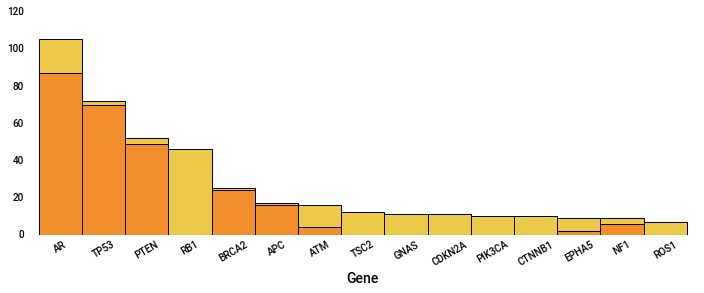

In [86]:
fig = plt.figure(figsize = (12,4))

ax = plt.subplot()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")  

plt.bar(range(0, len(genes)), values_1_2, 
        width = 1.0, color = tableau10[1], align="center", 
        label= 'Identified in PHIAL v1-TARGET v1 \n& PHIAL v2-TARGET v2')
plt.bar(range(0, len(genes)), delta_value, 
        width = 1.0, color = tableau10[5], align="center", 
        label= 'Identified only in PHIAL v2-TARGET v2', bottom = values_1_2)

#plt.title('Top 15 mutated genes in Melanoma cohort', fontsize = 16)
#plt.ylabel('# of putatively actionable or \n biologically relevant alterations', fontsize = 13)
plt.xlabel('Gene', fontsize = 14)

plt.xlim(-0.75,14.75)
ax.set_xticks(range(0, len(genes)))
ax.set_xticklabels(genes)
plt.xticks(rotation=30)

#plt.legend(frameon=False)
plt.savefig('prostate_genes.pdf', bbox_inches='tight')

### Actionable Patients

In [83]:
patients_actionable_1 = len(df_1['Tumor_Sample_Barcode'].unique())
frac_actionable_1 = float(patients_actionable_1) / float(150)

patients_actionable_2 = len(df_2['Tumor_Sample_Barcode'].unique())
frac_actionable_2 = float(patients_actionable_2) / float(150)
frac_notactionable = float(1) - frac_actionable_2

delta_actionable = frac_actionable_2 - frac_actionable_1

print 'Number of actionable patients in phial1:', str(patients_actionable_1)
print 'Number of actionable patients in phial2:', str(patients_actionable_2)
#print 'Not Actionable', str(not_actionable)

Number of actionable patients in phial1: 143
Number of actionable patients in phial2: 148


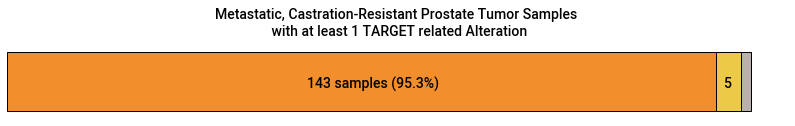

In [84]:
fig = plt.figure(figsize = (14,2))

ax = plt.subplot()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="off", left="off", right="off", labelleft="off") 

plt.barh(0.5, frac_actionable_1, color = tableau10[1], align = 'center')
plt.barh(0.5, delta_actionable, color = tableau10[5], left = frac_actionable_1, align = 'center')
plt.barh(0.5, frac_notactionable, color = tableau10[9], left = frac_actionable_2, align = 'center')

text1 = str(patients_actionable_1) + ' samples (' + str(round(frac_actionable_1*100,1)) + '%)'
plt.text(frac_actionable_1 - 0.55, 0.40, text1,
        fontsize = 14)
plt.text(frac_actionable_2 - 0.025, 0.40, '5', fontsize = 14)

plt.xlim(0,1.05)
plt.ylim(-.01,1.5)

plt.title('Metastatic, Castration-Resistant Prostate Tumor Samples \n with at least 1 TARGET related Alteration', 
          fontsize = 14, y = 0.70)
plt.legend()

#plt.show()
plt.savefig('prostate_samples.pdf', bbox_inches='tight')

In [85]:
df_prostate_11 = df_1
df_prostate_22 = df_2

## Combined Figure

### Import PHIAL1 - TARGET 2

In [26]:
allFiles = glob.glob('mel-ipi/output/phial1-target2/*/*detailed.txt')
df = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, index_col = None, sep = '\t', comment = '#', low_memory = False)
    
    # Quick fix for fusions
    sample_ = df_[df_['Variant_Classification'] == 'Missense_Mutation'].ix[:,'Tumor_Sample_Barcode'].unique().tolist()[0]
    df_['Tumor_Sample_Barcode'] = sample_
    df_ = df_.drop_duplicates(subset = ['Gene', 'Variant_Classification', 'Alteration'])
    list_.append(df_)

df = pd.concat(list_, ignore_index = True)

df_clin = df[df['bin'].astype(float) <= float(2)]
df_melanoma_12 = df_clin

In [27]:
allFiles = glob.glob('su2c/output/phial1-target2/*/*detailed.txt')
df = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, index_col = None, sep = '\t', comment = '#', low_memory = False)
    
    # Quick fix for fusions
    sample_ = df_[df_['Variant_Classification'] == 'Missense_Mutation'].ix[:,'Tumor_Sample_Barcode'].unique().tolist()[0]
    df_['Tumor_Sample_Barcode'] = sample_
    df_ = df_.drop_duplicates(subset = ['Gene', 'Variant_Classification', 'Alteration'])
    list_.append(df_)

df = pd.concat(list_, ignore_index = True)

df_clin = df[df['bin'].astype(float) <= float(2)]
df_prostate_12 = df_clin

### Import PHIAL 2 - TARGET 1

In [28]:
allFiles = glob.glob('mel-ipi/output/phial2-target1/*/*detailed.txt')
df = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, index_col = None, sep = '\t', comment = '#', low_memory = False)
    
    # Quick fix for fusions
    sample_ = df_[df_['Variant_Classification'] == 'Missense_Mutation'].ix[:,'Tumor_Sample_Barcode'].unique().tolist()[0]
    df_['Tumor_Sample_Barcode'] = sample_
    df_ = df_.drop_duplicates(subset = ['Gene', 'Variant_Classification', 'Alteration'])
    list_.append(df_)

df = pd.concat(list_, ignore_index = True)

df_clin = df[df['bin'].astype(float) <= float(2)]
df_melanoma_21 = df_clin

In [29]:
allFiles = glob.glob('su2c/output/phial2-target1/*/*detailed.txt')
df = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, index_col = None, sep = '\t', comment = '#', low_memory = False)
    
    # Quick fix for fusions
    sample_ = df_[df_['Variant_Classification'] == 'Missense_Mutation'].ix[:,'Tumor_Sample_Barcode'].unique().tolist()[0]
    df_['Tumor_Sample_Barcode'] = sample_
    df_ = df_.drop_duplicates(subset = ['Gene', 'Variant_Classification', 'Alteration'])
    list_.append(df_)

df = pd.concat(list_, ignore_index = True)

df_clin = df[df['bin'].astype(float) <= float(2)]
df_prostate_21 = df_clin

### Create Comparison Figure - 4

In [30]:
type_mut = ['Missense_Mutation', 'Nonsense_Mutation', 'Splice_Site']
type_indel = ['Frame_Shift_Del', 'Frame_Shift_Ins', 'In_Frame_Del', 'In_Frame_Ins']
type_cnv = ['Copy Number', 'Amplification', 'Deletion']
type_rearrangement = ['Rearrangement', 'Fusion']

In [31]:
# PHIAL1 - TARGET 1
# Melanoma
mel_muts_11 = df_melanoma_11[df_melanoma_11['Variant_Classification'].isin(type_mut)]
mel_indel_11 = df_melanoma_11[df_melanoma_11['Variant_Classification'].isin(type_indel)]
mel_cnv_11 = df_melanoma_11[df_melanoma_11['Variant_Classification'].isin(type_cnv)]
mel_rearrangement_11 = df_melanoma_11[df_melanoma_11['Variant_Classification'].isin(type_rearrangement)]
mel_global_11 = df_melanoma_11[df_melanoma_11['Gene'] == "Mut Burden"]

# Prostate
pros_muts_11 = df_prostate_11[df_prostate_11['Variant_Classification'].isin(type_mut)]
pros_indel_11 = df_prostate_11[df_prostate_11['Variant_Classification'].isin(type_indel)]
pros_cnv_11 = df_prostate_11[df_prostate_11['Variant_Classification'].isin(type_cnv)]
pros_rearrangement_11 = df_prostate_11[df_prostate_11['Variant_Classification'].isin(type_rearrangement)]
pros_global_11 = df_prostate_11[df_prostate_11['Gene'] == "Mut Burden"]


In [32]:
# PHIAL1 - TARGET 2
# Melanoma
mel_muts_12 = df_melanoma_12[df_melanoma_12['Variant_Classification'].isin(type_mut)]
mel_indel_12 = df_melanoma_12[df_melanoma_12['Variant_Classification'].isin(type_indel)]
mel_cnv_12 = df_melanoma_12[df_melanoma_12['Variant_Classification'].isin(type_cnv)]
mel_rearrangement_12 = df_melanoma_12[df_melanoma_12['Variant_Classification'].isin(type_rearrangement)]
mel_global_12 = df_melanoma_12[df_melanoma_12['Gene'] == "Mut Burden"]

# Prostate
pros_muts_12 = df_prostate_12[df_prostate_12['Variant_Classification'].isin(type_mut)]
pros_indel_12 = df_prostate_12[df_prostate_12['Variant_Classification'].isin(type_indel)]
pros_cnv_12 = df_prostate_12[df_prostate_12['Variant_Classification'].isin(type_cnv)]
pros_rearrangement_12 = df_prostate_12[df_prostate_12['Variant_Classification'].isin(type_rearrangement)]
pros_global_12 = df_prostate_12[df_prostate_12['Gene'] == "Mut Burden"]

In [33]:
# PHIAL2 - TARGET 1
# Melanoma
mel_muts_21 = df_melanoma_21[df_melanoma_21['Variant_Classification'].isin(type_mut)]
mel_indel_21 = df_melanoma_21[df_melanoma_21['Variant_Classification'].isin(type_indel)]
mel_cnv_21 = df_melanoma_21[df_melanoma_21['Variant_Classification'].isin(type_cnv)]
mel_rearrangement_21 = df_melanoma_21[df_melanoma_21['Variant_Classification'].isin(type_rearrangement)]
mel_global_21 = df_melanoma_21[df_melanoma_21['Gene'] == "Mut Burden"]

# Prostate
pros_muts_21 = df_prostate_21[df_prostate_21['Variant_Classification'].isin(type_mut)]
pros_indel_21 = df_prostate_21[df_prostate_21['Variant_Classification'].isin(type_indel)]
pros_cnv_21 = df_prostate_21[df_prostate_21['Variant_Classification'].isin(type_cnv)]
pros_rearrangement_21 = df_prostate_21[df_prostate_21['Variant_Classification'].isin(type_rearrangement)]
pros_global_21 = df_prostate_21[df_prostate_21['Gene'] == "Mut Burden"]


In [34]:
# PHIAL2 - TARGET 2
# Melanoma
mel_muts_22 = df_melanoma_22[df_melanoma_22['Variant_Classification'].isin(type_mut)]
mel_indel_22 = df_melanoma_22[df_melanoma_22['Variant_Classification'].isin(type_indel)]
mel_cnv_22 = df_melanoma_22[df_melanoma_22['Variant_Classification'].isin(type_cnv)]
mel_rearrangement_22 = df_melanoma_22[df_melanoma_22['Variant_Classification'].isin(type_rearrangement)]
mel_global_22 = df_melanoma_22[df_melanoma_22['Gene'] == "Mut Burden"]

# Prostate
pros_muts_22 = df_prostate_22[df_prostate_22['Variant_Classification'].isin(type_mut)]
pros_indel_22 = df_prostate_22[df_prostate_22['Variant_Classification'].isin(type_indel)]
pros_cnv_22 = df_prostate_22[df_prostate_22['Variant_Classification'].isin(type_cnv)]
pros_rearrangement_22 = df_prostate_22[df_prostate_22['Variant_Classification'].isin(type_rearrangement)]
pros_global_22 = df_prostate_22[df_prostate_22['Gene'] == "Mut Burden"]


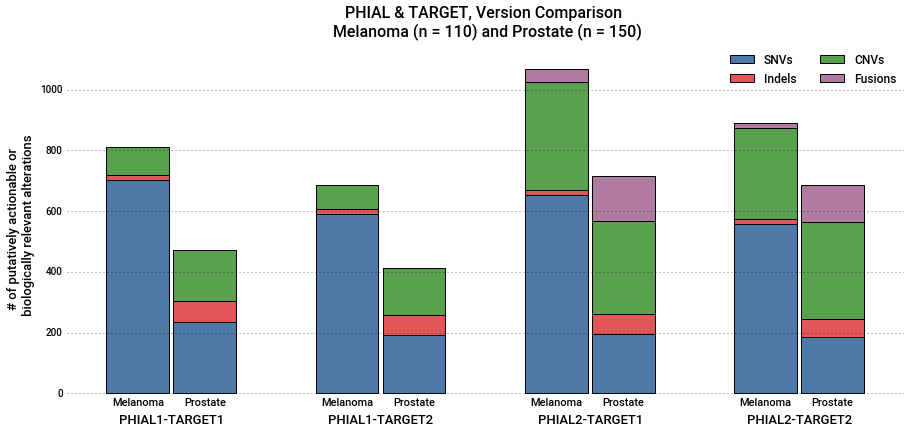

In [35]:
fig = plt.figure(figsize = (15, 6))

ax = plt.subplot()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")  

colors = [tableau10[0], tableau10[2], tableau10[4], tableau10[6], tableau10[5]]
labels = ['SNVs', 'Indels', 'CNVs', 'Fusions', 'Global']
width = 0.3

# --------- PHIAL1-TARGET1 -----------
plt.bar(0.84, len(mel_muts_11), width, color = colors[0], align = 'center')
plt.bar(0.84, len(mel_indel_11), width, color = colors[1], align = 'center',
        bottom = len(mel_muts_11))
plt.bar(0.84, len(mel_cnv_11), width, color = colors[2], align = 'center', 
        bottom = len(mel_muts_11) + len(mel_indel_11))
plt.bar(0.84, len(mel_rearrangement_11), width, color = colors[3], align = 'center',
        bottom = len(mel_muts_11) + len(mel_indel_11) + len(mel_cnv_11))
plt.bar(0.84, len(mel_global_11), width, color = colors[4], align = 'center',
        bottom = len(mel_muts_11) + len(mel_indel_11) + len(mel_cnv_11) + len(mel_rearrangement_11))

plt.bar(1.16, len(pros_muts_11), width, color = colors[0], align = 'center')
plt.bar(1.16, len(pros_indel_11), width, color = colors[1], align = 'center',
        bottom = len(pros_muts_11))
plt.bar(1.16, len(pros_cnv_11), width, color = colors[2], align = 'center', 
        bottom = len(pros_muts_11) + len(pros_indel_11))
plt.bar(1.16, len(pros_rearrangement_11), width, color = colors[3], align = 'center',
        bottom = len(pros_muts_11) + len(pros_indel_11) + len(pros_cnv_11))
plt.bar(1.16, len(pros_global_11), width, color = colors[4], align = 'center',
        bottom = len(pros_muts_11) + len(pros_indel_11) + len(pros_cnv_11) + len(pros_rearrangement_11))

# --------- PHIAL1-TARGET2 -----------

plt.bar(1.84, len(mel_muts_12), width, color = colors[0], align = 'center')
plt.bar(1.84, len(mel_indel_12), width, color = colors[1], align = 'center',
        bottom = len(mel_muts_12))
plt.bar(1.84, len(mel_cnv_12), width, color = colors[2], align = 'center', 
        bottom = len(mel_muts_12) + len(mel_indel_12))
plt.bar(1.84, len(mel_rearrangement_12), width, color = colors[3], align = 'center',
        bottom = len(mel_muts_12) + len(mel_indel_12) + len(mel_cnv_12))
plt.bar(1.84, len(mel_global_12), width, color = colors[4], align = 'center',
        bottom = len(mel_muts_12) + len(mel_indel_12) + len(mel_cnv_12) + len(mel_rearrangement_12))

plt.bar(2.16, len(pros_muts_12), width, color = colors[0], align = 'center')
plt.bar(2.16, len(pros_indel_12), width, color = colors[1], align = 'center',
        bottom = len(pros_muts_12))
plt.bar(2.16, len(pros_cnv_12), width, color = colors[2], align = 'center', 
        bottom = len(pros_muts_12) + len(pros_indel_12))
plt.bar(2.16, len(pros_rearrangement_12), width, color = colors[3], align = 'center',
        bottom = len(pros_muts_12) + len(pros_indel_12) + len(pros_cnv_12))
plt.bar(2.16, len(pros_global_12), width, color = colors[4], align = 'center',
        bottom = len(pros_muts_12) + len(pros_indel_12) + len(pros_cnv_12) + len(pros_rearrangement_12))

# --------- PHIAL2-TARGET1 -----------
plt.bar(2.84, len(mel_muts_21), width, color = colors[0], align = 'center')
plt.bar(2.84, len(mel_indel_21), width, color = colors[1], align = 'center',
        bottom = len(mel_muts_21))
plt.bar(2.84, len(mel_cnv_21), width, color = colors[2], align = 'center', 
        bottom = len(mel_muts_21) + len(mel_indel_21))
plt.bar(2.84, len(mel_rearrangement_21), width, color = colors[3], align = 'center',
        bottom = len(mel_muts_21) + len(mel_indel_22) + len(mel_cnv_21))
plt.bar(2.84, len(mel_global_21), width, color = colors[4], align = 'center',
        bottom = len(mel_muts_21) + len(mel_indel_21) + len(mel_cnv_21) + len(mel_rearrangement_21))

plt.bar(3.16, len(pros_muts_21), width, color = colors[0], align = 'center')
plt.bar(3.16, len(pros_indel_21), width, color = colors[1], align = 'center',
        bottom = len(pros_muts_21))
plt.bar(3.16, len(pros_cnv_21), width, color = colors[2], align = 'center', 
        bottom = len(pros_muts_21) + len(pros_indel_21))
plt.bar(3.16, len(pros_rearrangement_21), width, color = colors[3], align = 'center',
        bottom = len(pros_muts_21) + len(pros_indel_21) + len(pros_cnv_21))
plt.bar(3.16, len(pros_global_21), width, color = colors[4], align = 'center',
        bottom = len(pros_muts_21) + len(pros_indel_21) + len(pros_cnv_21) + len(pros_rearrangement_21))

# --------- PHIAL2-TARGET2 -----------
plt.bar(3.84, len(mel_muts_22), width, color = colors[0], align = 'center')
plt.bar(3.84, len(mel_indel_22), width, color = colors[1], align = 'center',
        bottom = len(mel_muts_22))
plt.bar(3.84, len(mel_cnv_22), width, color = colors[2], align = 'center', 
        bottom = len(mel_muts_22) + len(mel_indel_22))
plt.bar(3.84, len(mel_rearrangement_22), width, color = colors[3], align = 'center',
        bottom = len(mel_muts_22) + len(mel_indel_22) + len(mel_cnv_22))
plt.bar(3.84, len(mel_global_22), width, color = colors[4], align = 'center',
        bottom = len(mel_muts_22) + len(mel_indel_22) + len(mel_cnv_22) + len(mel_rearrangement_22))

plt.bar(4.16, len(pros_muts_22), width, label = labels[0], color = colors[0], align = 'center')
plt.bar(4.16, len(pros_indel_22), width, label = labels[1], color = colors[1], align = 'center',
        bottom = len(pros_muts_22))
plt.bar(4.16, len(pros_cnv_22), width, label = labels[2], color = colors[2], align = 'center', 
        bottom = len(pros_muts_22) + len(pros_indel_22))
plt.bar(4.16, len(pros_rearrangement_22), width, label = labels[3], color = colors[3], align = 'center',
        bottom = len(pros_muts_22) + len(pros_indel_22) + len(pros_cnv_22))
plt.bar(4.16, len(pros_global_22), width, color = colors[4], align = 'center',
        bottom = len(pros_muts_22) + len(pros_indel_22) + len(pros_cnv_22) + len(pros_rearrangement_22))

plt.ylim([-2, 1100])
plt.xlim([0.5,4.5])
plt.ylabel('# of putatively actionable or \n biologically relevant alterations', fontsize = 13)

labels = ['Melanoma', 'Prostate', 'Melanoma', 'Prostate', 'Melanoma', 'Prostate', 'Melanoma', 'Prostate']
ax.set_xticks([0.84, 1.16, 1.84, 2.16, 2.84, 3.16, 3.84, 4.16])
ax.set_xticklabels(labels, fontsize = 11)


plt.title('PHIAL & TARGET, Version Comparison \n Melanoma (n = 110) and Prostate (n = 150)', y = 1.05, fontsize = 16)
plt.legend(loc = 2, ncol = 2, frameon=False, bbox_to_anchor = (0.78, 1.05))

plt.text(0.75, -100,'PHIAL1-TARGET1', fontsize = 13)
plt.text(1.75, -100,'PHIAL1-TARGET2', fontsize = 13)
plt.text(2.75, -100,'PHIAL2-TARGET1', fontsize = 13)
plt.text(3.75, -100,'PHIAL2-TARGET2', fontsize = 13)

plt.gca().yaxis.grid(True)
plt.show()

### Create Comparison Figure - 2

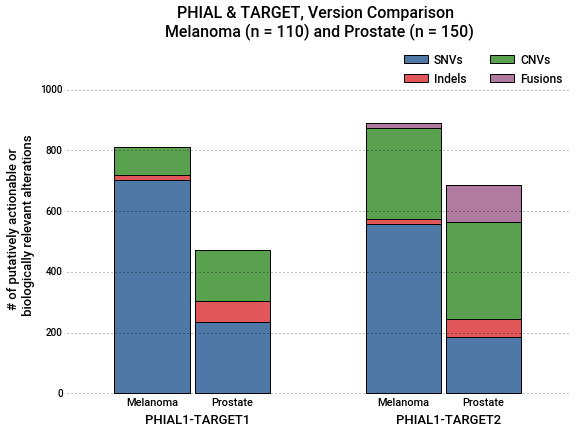

In [70]:
fig = plt.figure(figsize = (9, 6))

ax = plt.subplot()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.tick_params(axis="both", which="both", bottom="off", top="off",
    labelbottom="on", left="off", right="off", labelleft="on")  

colors = [tableau10[0], tableau10[2], tableau10[4], tableau10[6], tableau10[5]]
labels = ['SNVs', 'Indels', 'CNVs', 'Fusions', 'Global']
width = 0.3

# --------- PHIAL1-TARGET1 -----------
plt.bar(0.84, len(mel_muts_11), width, color = colors[0], align = 'center')
plt.bar(0.84, len(mel_indel_11), width, color = colors[1], align = 'center',
        bottom = len(mel_muts_11))
plt.bar(0.84, len(mel_cnv_11), width, color = colors[2], align = 'center', 
        bottom = len(mel_muts_11) + len(mel_indel_11))
plt.bar(0.84, len(mel_rearrangement_11), width, color = colors[3], align = 'center',
        bottom = len(mel_muts_11) + len(mel_indel_11) + len(mel_cnv_11))
plt.bar(0.84, len(mel_global_11), width, color = colors[4], align = 'center',
        bottom = len(mel_muts_11) + len(mel_indel_11) + len(mel_cnv_11) + len(mel_rearrangement_11))

plt.bar(1.16, len(pros_muts_11), width, color = colors[0], align = 'center')
plt.bar(1.16, len(pros_indel_11), width, color = colors[1], align = 'center',
        bottom = len(pros_muts_11))
plt.bar(1.16, len(pros_cnv_11), width, color = colors[2], align = 'center', 
        bottom = len(pros_muts_11) + len(pros_indel_11))
plt.bar(1.16, len(pros_rearrangement_11), width, color = colors[3], align = 'center',
        bottom = len(pros_muts_11) + len(pros_indel_11) + len(pros_cnv_11))
plt.bar(1.16, len(pros_global_11), width, color = colors[4], align = 'center',
        bottom = len(pros_muts_11) + len(pros_indel_11) + len(pros_cnv_11) + len(pros_rearrangement_11))

# --------- PHIAL2-TARGET2 -----------
plt.bar(1.84, len(mel_muts_22), width, color = colors[0], align = 'center')
plt.bar(1.84, len(mel_indel_22), width, color = colors[1], align = 'center',
        bottom = len(mel_muts_22))
plt.bar(1.84, len(mel_cnv_22), width, color = colors[2], align = 'center', 
        bottom = len(mel_muts_22) + len(mel_indel_22))
plt.bar(1.84, len(mel_rearrangement_22), width, color = colors[3], align = 'center',
        bottom = len(mel_muts_22) + len(mel_indel_22) + len(mel_cnv_22))
plt.bar(1.84, len(mel_global_22), width, color = colors[4], align = 'center',
        bottom = len(mel_muts_22) + len(mel_indel_22) + len(mel_cnv_22) + len(mel_rearrangement_22))

plt.bar(2.16, len(pros_muts_22), width, label = labels[0], color = colors[0], align = 'center')
plt.bar(2.16, len(pros_indel_22), width, label = labels[1], color = colors[1], align = 'center',
        bottom = len(pros_muts_22))
plt.bar(2.16, len(pros_cnv_22), width, label = labels[2], color = colors[2], align = 'center', 
        bottom = len(pros_muts_22) + len(pros_indel_22))
plt.bar(2.16, len(pros_rearrangement_22), width, label = labels[3], color = colors[3], align = 'center',
        bottom = len(pros_muts_22) + len(pros_indel_22) + len(pros_cnv_22))
plt.bar(2.16, len(pros_global_22), width, color = colors[4], align = 'center',
        bottom = len(pros_muts_22) + len(pros_indel_22) + len(pros_cnv_22) + len(pros_rearrangement_22))

plt.ylim([-2, 1100])
plt.xlim([0.5,2.5])
plt.ylabel('# of putatively actionable or \n biologically relevant alterations', fontsize = 13)

labels = ['Melanoma', 'Prostate', 'Melanoma', 'Prostate', 'Melanoma', 'Prostate', 'Melanoma', 'Prostate']
ax.set_xticks([0.84, 1.16, 1.84, 2.16])
ax.set_xticklabels(labels, fontsize = 11)


plt.title('PHIAL & TARGET, Version Comparison \n Melanoma (n = 110) and Prostate (n = 150)', y = 1.05, fontsize = 16)
plt.legend(loc = 2, ncol = 2, frameon=False, bbox_to_anchor = (0.65, 1.05), handletextpad=0.5)

plt.text(0.81, -100,'PHIAL1-TARGET1', fontsize = 13)
plt.text(1.81, -100,'PHIAL1-TARGET2', fontsize = 13)

plt.gca().yaxis.grid(True)
#plt.show()
plt.savefig('version_comparison.pdf', bbox_inches='tight')

## % Clinical Trial and FDA

In [36]:
FDA_variants = 0
FDA_variants += len(df_melanoma_22[df_melanoma_22['Score_bin_Sensitive'] == "FDA-Approved"])
FDA_variants += len(df_melanoma_22[df_melanoma_22['Score_bin_Resistant'] == "FDA-Approved"])
FDA_variants += len(df_prostate_22[df_prostate_22['Score_bin_Sensitive'] == "FDA-Approved"])
FDA_variants += len(df_prostate_22[df_prostate_22['Score_bin_Resistant'] == "FDA-Approved"])

In [37]:
float(FDA_variants) / float(len(df_prostate_22) + len(df_melanoma_22))

0.17227378190255221

In [38]:
FDA_variants = 0

fda_status = (df_melanoma_22['Score_bin_Sensitive'] == 'FDA-Approved') | (df_melanoma_22['Score_bin_Resistant'] == 'FDA-Approved')
FDA_variants += len(df_melanoma_22[fda_status])

fda_status = (df_prostate_22['Score_bin_Sensitive'] == 'FDA-Approved') | (df_prostate_22['Score_bin_Resistant'] == 'FDA-Approved')
FDA_variants += len(df_prostate_22[fda_status])

In [39]:
float(FDA_variants) / float(len(df_prostate_22) + len(df_melanoma_22))

0.14501160092807425

In [40]:
CT_variants = 0

ct_status = (df_melanoma_22['Score_bin_Sensitive'] == 'Level A') | (df_melanoma_22['Score_bin_Resistant'] == 'Level A')
CT_variants += len(df_melanoma_22[ct_status])

ct_status = (df_prostate_22['Score_bin_Sensitive'] == 'Level A') | (df_prostate_22['Score_bin_Resistant'] == 'Level A')
CT_variants += len(df_prostate_22[ct_status])

In [41]:
float(CT_variants) / float(len(df_prostate_22) + len(df_melanoma_22))

0.08990719257540604